In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [2]:
df_cibil_feat = pd.read_csv("./dw_out/df_cibil_feat.csv")

In [3]:
df_cibil_feat=df_cibil_feat.drop(columns=['Unnamed: 0'])
df_cibil_feat.head()

,key,timestamp,datetime_formatted,cibil_score,total_email,gender,age,open_loans,closed_loans,total_address,...,last_3_months_dpd_cc,last_6_months_dpd_cc,last_12_months_dpd_cc,last_36_months_dpd_cc,next_3_months_dpd_cc,next_6_months_dpd_cc,next_12_months_dpd_cc,next_36_months_dpd_cc,time_rank,output
0,0-10,11-16,2016-11-01,645.0,4,0,36,1,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0
1,0-9,10-18,2018-10-01,645.0,4,0,38,1,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0
2,0-8,11-18,2018-11-01,645.0,4,0,38,2,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0
3,3-6,3-18,2018-03-01,757.0,1,0,24,1,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,2
4,3-4,9-18,2018-09-01,757.0,1,0,25,3,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,0


In [4]:
df_cibil_feat.shape #old (2413, 84)

(6195, 84)

In [32]:
df_cibil_feat['user_id']=df_cibil_feat['key'].apply(lambda s: s.split("-")[0])

In [33]:
len(df_cibil_feat.user_id.unique())

847

In [133]:
df = df_cibil_feat[['user_id','key','cibil_score', 'datetime_formatted', 'total_email',
       'gender', 'age', 'open_loans', 'closed_loans', 'total_address','sanc_amount',
        'total_phone_nos', 'total_enq_till_date', 'unique_enquiry_purpose',
       'total_enq_amt',  'loan_type', 'ownership',
       'enquiry_purpose','last_3_months_dpd_gl',
       'last_6_months_dpd_gl', 'last_12_months_dpd_gl',
       'last_36_months_dpd_gl','last_3_months_dpd_personal', 'last_6_months_dpd_personal',
       'last_12_months_dpd_personal', 'last_36_months_dpd_personal','last_3_months_dpd_cvl', 'last_6_months_dpd_cvl',
       'last_12_months_dpd_cvl', 'last_36_months_dpd_cvl','last_3_months_dpd_cc', 'last_6_months_dpd_cc', 'last_12_months_dpd_cc',
       'last_36_months_dpd_cc', 
       'last_3_months_dpd_all', 'last_6_months_dpd_all', 'last_12_months_dpd_all',
       'last_36_months_dpd_all',          
       'total_enq_till_date_on_user_id_enq_purpose',
       'unique_enquiry_purpose_on_user_id_enq_purpose',
       'total_enq_amt_on_user_id_enq_purpose','output']]

In [134]:
df.loan_type.value_counts()

0    1871
3    1820
4     943
5     846
2     607
1     108
Name: loan_type, dtype: int64

In [135]:
df = df[df['loan_type'].isin([2,4,5])]

In [136]:
#df.shape(891, 36)
df.shape

(2396, 42)

In [137]:
import numpy as np

np.sort(df.datetime_formatted.unique())

array(['2005-01-01', '2005-10-01', '2006-07-01', '2006-09-01',
       '2006-11-01', '2006-12-01', '2007-04-01', '2007-06-01',
       '2007-07-01', '2007-10-01', '2008-01-01', '2008-02-01',
       '2008-04-01', '2008-08-01', '2008-10-01', '2008-12-01',
       '2009-10-01', '2010-02-01', '2010-11-01', '2011-01-01',
       '2011-04-01', '2011-05-01', '2011-07-01', '2011-08-01',
       '2011-10-01', '2011-11-01', '2011-12-01', '2012-01-01',
       '2012-02-01', '2012-04-01', '2012-05-01', '2012-06-01',
       '2012-10-01', '2012-12-01', '2013-01-01', '2013-02-01',
       '2013-04-01', '2013-06-01', '2013-07-01', '2013-08-01',
       '2013-10-01', '2013-12-01', '2014-01-01', '2014-02-01',
       '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
       '2014-07-01', '2014-08-01', '2014-10-01', '2014-11-01',
       '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01',
       '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01',
       '2015-08-01', '2015-09-01', '2015-10-01', '2015-

In [138]:
print(len(df.datetime_formatted.unique()))

147


In [139]:
0.20*164

32.800000000000004

In [140]:
df.shape

(2396, 42)

In [141]:
df['output'].value_counts()

0    2002
3     204
2      99
1      91
Name: output, dtype: int64

In [142]:
df['output'] = df.apply(lambda s: s['output'] if s['output'] <=0 else 1,axis=1)

In [143]:
df['output'].value_counts()

0    2002
1     394
Name: output, dtype: int64

In [144]:
df.head()

,user_id,key,cibil_score,datetime_formatted,total_email,gender,age,open_loans,closed_loans,total_address,...,last_12_months_dpd_cc,last_36_months_dpd_cc,last_3_months_dpd_all,last_6_months_dpd_all,last_12_months_dpd_all,last_36_months_dpd_all,total_enq_till_date_on_user_id_enq_purpose,unique_enquiry_purpose_on_user_id_enq_purpose,total_enq_amt_on_user_id_enq_purpose,output
2,0,0-8,645.0,2018-11-01,4,0,38,2,1,4,...,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0
5,3,3-5,757.0,2018-09-01,1,0,25,3,0,3,...,NaN,NaN,34.0,34.0,34.0,34.0,0,0,0,0
6,3,3-3,757.0,2018-11-01,1,0,25,4,0,3,...,NaN,NaN,32.0,34.0,34.0,34.0,4,4,100000,0
11,7,7-11,617.0,2006-11-01,3,0,30,2,0,4,...,NaN,NaN,0.0,0.0,0.0,0.0,4,4,300000,0
12,7,7-9,617.0,2007-06-01,3,0,31,3,0,4,...,NaN,NaN,0.0,0.0,0.0,0.0,9,6,525000,0


In [145]:
len(df.user_id.unique())

576

In [146]:
max(df['datetime_formatted']),min(df['datetime_formatted'])

('2022-10-01', '2005-01-01')

In [147]:
df_2021_08 = df[df['datetime_formatted'] >= '2021-08-01']
df_2021_08.shape

(333, 42)

In [148]:
len(df_2021_08.user_id.unique())

143

In [149]:
df_2021_08.output.value_counts()

0    321
1     12
Name: output, dtype: int64

In [150]:
df_2021_08_0 = df_2021_08[df_2021_08['output']==0]
df_2021_08_1 = df_2021_08[df_2021_08['output']==1]

In [151]:
df_2021_08_0.shape, df_2021_08_1.shape

((321, 42), (12, 42))

In [152]:
df_2021_08_0_users = df_2021_08_0.user_id.unique()
df_2021_08_1_users = df_2021_08_1.user_id.unique()

In [153]:
df_2021_08_0_users.shape, df_2021_08_1_users.shape

((136,), (11,))

In [154]:
from random import sample

In [156]:
df_2021_08_0_users_train = sample(list(df_2021_08_0_users), 108)

In [157]:
df_2021_08_1_users_train = sample(list(df_2021_08_1_users), 8)

In [158]:
df_2021_08_0_users_test = set(list(df_2021_08_0_users)) - set(df_2021_08_0_users_train)
len(df_2021_08_0_users_test),len(df_2021_08_0_users),len(df_2021_08_0_users_train)

(28, 136, 108)

In [159]:
df_2021_08_1_users_test = set(list(df_2021_08_1_users)) - set(df_2021_08_1_users_train)
len(df_2021_08_1_users_test),len(df_2021_08_1_users),len(df_2021_08_1_users_train)

(3, 11, 8)

In [160]:
df_train = df[df['datetime_formatted'] < '2021-08-01']
df_valid = df[df['datetime_formatted'] >= '2021-08-01']

In [161]:
# remove test user from df_train_2022
print(df_train.shape)
df_train = df_train[~df_train['user_id'].isin(df_2021_08_1_users_test)]
print(df_train.shape)

(2063, 42)
(2057, 42)


In [162]:
# remove test user from df_train_2022
print(df_train.shape)
df_train = df_train[~df_train['user_id'].isin(df_2021_08_0_users_test)]
print(df_train.shape)

(2057, 42)
(1896, 42)


In [163]:
# add some 2021 data into users
print(df_2021_08.shape)
df_2021_08_revised = df_2021_08[~df_2021_08['user_id'].isin(df_2021_08_1_users_test)]
print(df_2021_08_revised.shape)

(333, 42)
(326, 42)


In [164]:
# add some 2021 data into users
print(df_2021_08_revised.shape)
df_2021_08_revised = df_2021_08_revised[~df_2021_08_revised['user_id'].isin(df_2021_08_0_users_test)]
print(df_2021_08_revised.shape)

(326, 42)
(273, 42)


In [165]:
df_train=df_train.append(df_2021_08_revised)

In [166]:
df_train.shape

(2169, 42)

In [167]:
df_train['output'].value_counts()

0    1798
1     371
Name: output, dtype: int64

In [168]:
df_valid['output'].value_counts()

0    321
1     12
Name: output, dtype: int64

In [197]:
df_valid.shape

(333, 42)

In [169]:
df_train['output'].value_counts()

0    1798
1     371
Name: output, dtype: int64

In [170]:
df_train_0 = df_train[df_train['output']==0]
df_train_1 = df_train[df_train['output']==1]

In [171]:
df_train_0.shape, df_train_1.shape

((1798, 42), (371, 42))

In [172]:
df_train_0 = df_train_0.sample(n=750, random_state=42)
df_train_0.shape

(750, 42)

In [173]:
df_train_sample = df_train_0.append(df_train_1)
df_train_sample.shape

(1121, 42)

In [175]:
X_train = df_train_sample[['total_email',
       'gender', 'age', 'open_loans', 'closed_loans', 'total_address','sanc_amount',
        'total_phone_nos',
        'loan_type', 'ownership',
        'last_3_months_dpd_gl',
       'last_6_months_dpd_gl', 'last_12_months_dpd_gl',
       'last_36_months_dpd_gl','last_3_months_dpd_personal', 'last_6_months_dpd_personal',
       'last_12_months_dpd_personal', 'last_36_months_dpd_personal','last_3_months_dpd_cvl', 'last_6_months_dpd_cvl',
       'last_12_months_dpd_cvl', 'last_36_months_dpd_cvl','last_3_months_dpd_cc', 'last_6_months_dpd_cc', 'last_12_months_dpd_cc',
       'last_36_months_dpd_cc',
        'last_3_months_dpd_all', 'last_6_months_dpd_all', 'last_12_months_dpd_all','last_36_months_dpd_all']]
       #'total_enq_till_date', 'unique_enquiry_purpose',
       #'total_enq_amt',  
       #'enquiry_purpose',
       #'total_enq_till_date_on_user_id_enq_purpose',
       #'unique_enquiry_purpose_on_user_id_enq_purpose',
       #'total_enq_amt_on_user_id_enq_purpose']]

y_train = df_train_sample[['output']]

In [176]:
X_test = df_valid[['total_email',
       'gender', 'age', 'open_loans', 'closed_loans', 'total_address','sanc_amount',
        'total_phone_nos', 
        'loan_type', 'ownership',
        'last_3_months_dpd_gl',
       'last_6_months_dpd_gl', 'last_12_months_dpd_gl',
       'last_36_months_dpd_gl','last_3_months_dpd_personal', 'last_6_months_dpd_personal',
       'last_12_months_dpd_personal', 'last_36_months_dpd_personal','last_3_months_dpd_cvl', 'last_6_months_dpd_cvl',
       'last_12_months_dpd_cvl', 'last_36_months_dpd_cvl','last_3_months_dpd_cc', 'last_6_months_dpd_cc', 'last_12_months_dpd_cc',
       'last_36_months_dpd_cc',
       'last_3_months_dpd_all', 'last_6_months_dpd_all', 'last_12_months_dpd_all','last_36_months_dpd_all']]
       #'total_enq_till_date_on_user_id_enq_purpose',
       #'total_enq_till_date_on_user_id_enq_purpose',
       #'unique_enquiry_purpose_on_user_id_enq_purpose',
       #'total_enq_amt_on_user_id_enq_purpose']]

y_test = df_valid[['output']]

In [177]:
from sklearn.metrics import DistanceMetric


In [178]:
y = df[['output']]
y['output'].value_counts()

0    2002
1     394
Name: output, dtype: int64

In [179]:
y_train['output'].value_counts()

0    750
1    371
Name: output, dtype: int64

In [180]:
y_test['output'].value_counts()

0    321
1     12
Name: output, dtype: int64

In [181]:
.20*df.shape[0]

479.20000000000005

In [182]:
X_train.shape, X_test.shape

((1121, 30), (333, 30))

In [183]:
y_train.shape, y_test.shape

((1121, 1), (333, 1))

In [184]:
xgb_classifier =XGBClassifier(n_estimators=1000)

In [185]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train['output'] #provide your own target name
)
# 
# xgb_classifier.fit(X, y, sample_weight=sample_weights)

In [186]:
len(sample_weights)

1121

In [187]:
xgb_classifier.fit(X_train,y_train,sample_weight=sample_weights)
#xgb_classifier.fit(X_train,y_train)


/home/ubuntu/anaconda3/envs/faiss/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ubuntu/anaconda3/envs/faiss/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/anaconda3/envs/faiss/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[10:17:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [188]:
predictions = xgb_classifier.predict(X_test)


In [189]:
y_proba = xgb_classifier.predict_proba(X_test)

In [190]:
print("Accuracy of Model::",accuracy_score(y_test,predictions))


Accuracy of Model:: 0.9459459459459459


In [191]:
#print("Accuracy of Model::",accuracy_score(y_test,predictions))


In [192]:
y_test['output'].value_counts()

0    321
1     12
Name: output, dtype: int64

In [193]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve,classification_report

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [194]:
print(confusion_matrix(y_test,predictions))

[[306  15]
 [  3   9]]


In [195]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       321
           1       0.38      0.75      0.50        12

    accuracy                           0.95       333
   macro avg       0.68      0.85      0.74       333
weighted avg       0.97      0.95      0.95       333



In [196]:
import pickle
file_name = "./dw_out/xgb_cibil_classifier.pkl"

# save
pickle.dump(xgb_classifier, open(file_name, "wb"))


In [205]:
# 

<Figure size 2880x1440 with 0 Axes>

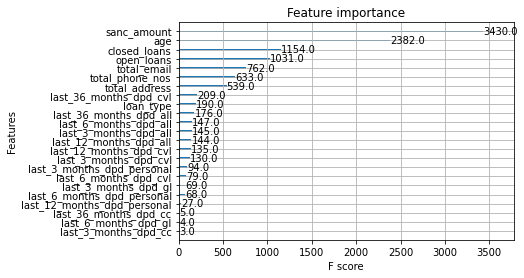

In [210]:
from xgboost import plot_importance
from matplotlib import pyplot
plt.figure(figsize=(40,20))

plot_importance(xgb_classifier)
plt.rcParams["figure.figsize"] = (30,100)
plt.show()
